# Yolov7 훈련

In [2]:
# 훈련환경 준비
!git clone https://github.com/WongKinYiu/yolov7 # 깃 저장소 복사

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 11.53 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [4]:
%pip install -qr requirements.txt # 필수(requirements)패키지 설치

Note: you may need to restart the kernel to use updated packages.


## 환경 테스트

In [4]:
# 훈련 환경 테스트 v1
!python detect.py --source ../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4

Namespace(weights='yolov7.pt', source='../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.0.1 CPU

100%|██████████████████████████████████████| 72.1M/72.1M [00:06<00:00, 10.9MB/s]

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

video 1/1 (1/658) /Users/i/Downloads/crosswalk_project2/yolov7/../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4: /Users/i/anaconda3/envs/DB-GPT/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be r

Namespace(weights=['yolov7-tiny.pt'], source='inference/images', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.0.1 CPU

100%|██████████████████████████████████████| 12.1M/12.1M [00:01<00:00, 11.4MB/s]

Fusing layers... 
Model Summary: 200 layers, 6219709 parameters, 229245 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/Users/i/anaconda3/envs/DB-GPT/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
4 persons, 1 bus, Do

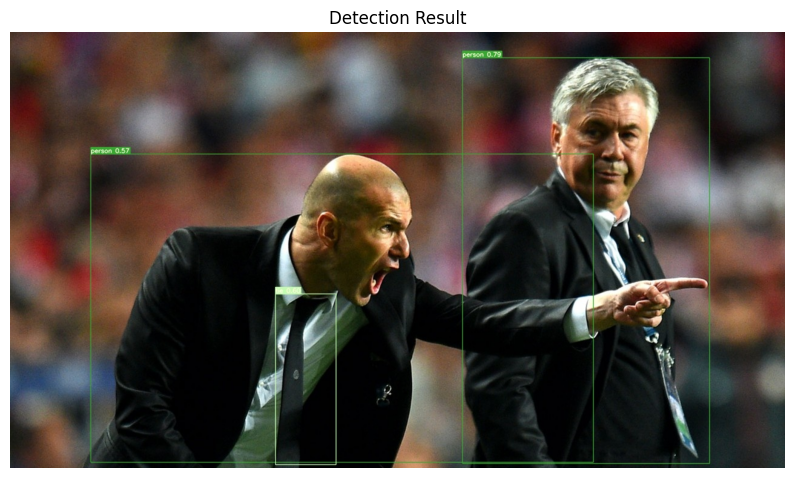

In [5]:
# 훈련 환경 테스트 v2
## 입력 데이터 해상도 640*640, confidence >=0.25인 객체만 검출
!python detect.py --weights yolov7-tiny.pt --img 640 --conf 0.25 --source inference/images

import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./runs/detect/exp2/zidane.jpg')

# OpenCV는 BGR 형식을 사용하므로 RGB로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Matplotlib으로 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.title("Detection Result")
plt.show()

## 훈련

In [5]:
# yaml 파일 제작
text_lines='''
train: ../VOCData/train
val: ../VOCData/val
    
# number of classes
nc: 20

# class names
names: ["aeroplane", "bicycle", "bird", "boat", "bottle", 
       "bus", "car", "cat", "chair", "cow", "diningtable", 
       "dog", "horse", "motorbike", "person", "pottedplant", 
       "sheep", "sofa", "train", "tvmonitor"]
'''

with open('./vocdata.yaml','w') as f:
    f.write(text_lines)

In [ ]:
# 훈련 ## 훈련 시간 84m 9.2s
!python train.py --img 320 --batch 8 --epochs 20 --data vocdata.yaml --weights yolov7-tiny.pt --cache
## 훈련 해상도 : 640*640 => 320*320
## 배치 크기 : 16, 에포크 수 : 20, 가중치 : yolov7-tiny.pt
## cache : 훈련을 빠르게 하기 위해 사용. 데이터세트를 읽은 후 이진 파일로 저장

YOLOR 🚀 v0.1-128-ga207844 torch 2.0.1 CPU

Namespace(weights='yolov7-tiny.pt', cfg='', data='vocdata.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=20, batch_size=8, img_size=[320, 320], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=True, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/exp', total_batch_size=8)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=1.0,

In [ ]:
# 추론 #51.1s
!python detect.py --weights ./yolov7-tiny.pt --img 640 --conf 0.25 --source ../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4 --view-img

Namespace(weights=['./yolov7-tiny.pt'], source='../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.0.1 CPU

Fusing layers... 
Model Summary: 200 layers, 6219709 parameters, 229245 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

video 1/1 (1/658) /Users/i/Downloads/crosswalk_project2/yolov7/../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4: /Users/i/anaconda3/envs/dbgpt_env2/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)

In [13]:
# 추론 테스트 #49.3s
!python detect.py --weights ../book_weight/yolov7_tiny_voc.pt --img 640 --conf 0.25 --source ../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4 --view-img

Namespace(weights=['../book_weight/yolov7_tiny_voc.pt'], source='../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.0.1 CPU

Fusing layers... 
/Users/i/anaconda3/envs/dbgpt_env2/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 200 layers, 6057889 parameters, 0 gradients, 13.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

video 1/1 (1/658) /Users/i/D

In [14]:
# 추론 테스트 #49.1s
!python detect.py --weights ./runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source ../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4 --view-img

Namespace(weights=['./runs/train/exp/weights/best.pt'], source='../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.0.1 CPU

Fusing layers... 
/Users/i/anaconda3/envs/dbgpt_env2/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 200 layers, 6057889 parameters, 0 gradients, 13.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

video 1/1 (1/658) /Users/i/Do